In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
# === Load CIFAR-10 ===
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# === Define CNN Model ===

cnn_no_aug = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_no_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_no_aug = cnn_no_aug.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4035 - loss: 1.6425 - val_accuracy: 0.5777 - val_loss: 1.1762
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6482 - loss: 1.0015 - val_accuracy: 0.6792 - val_loss: 0.9199
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7195 - loss: 0.7987 - val_accuracy: 0.7110 - val_loss: 0.8366
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7681 - loss: 0.6659 - val_accuracy: 0.7413 - val_loss: 0.7584
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8093 - loss: 0.5449 - val_accuracy: 0.7512 - val_loss: 0.7380
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8446 - loss: 0.4397 - val_accuracy: 0.7302 - val_loss: 0.8354
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8729 - loss: 0.3605 - val_accuracy: 0.7381 - val_loss: 0.8738
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9091 - loss: 0.2621 - val_accu

In [ ]:
# Define Augmentation Layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:
# Augment dataset
augmented_train = data_augmentation(x_train)

In [ ]:

# Use tf.data for better training pipeline
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(64).map(
    lambda x, y: (data_augmentation(x), y)
)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

In [ ]:
# Train the model
cnn_aug = build_cnn_model()
history_aug = cnn_aug.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3507 - loss: 1.7765 - val_accuracy: 0.5181 - val_loss: 1.3603
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5444 - loss: 1.2743 - val_accuracy: 0.6166 - val_loss: 1.0803
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6004 - loss: 1.1196 - val_accuracy: 0.6316 - val_loss: 1.0394
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6381 - loss: 1.0218 - val_accuracy: 0.6820 - val_loss: 0.9143
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6648 - loss: 0.9517 - val_accuracy: 0.6833 - val_loss: 0.9550
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6816 - loss: 0.9015 - val_accuracy: 0.7062 - val_loss: 0.8620
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6951 - loss: 0.8596 - val_accuracy: 0.7055 - val_loss: 0.8569
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7104 - loss: 0.8184 - val_accu

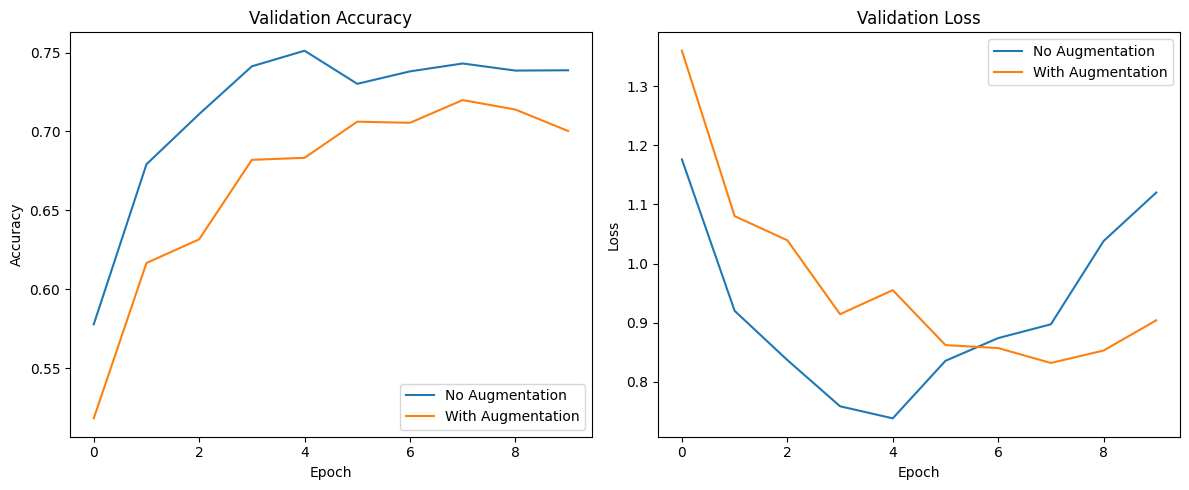

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_no_aug.history['val_accuracy'], label='No Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='With Augmentation')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_no_aug.history['val_loss'], label='No Augmentation')
plt.plot(history_aug.history['val_loss'], label='With Augmentation')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


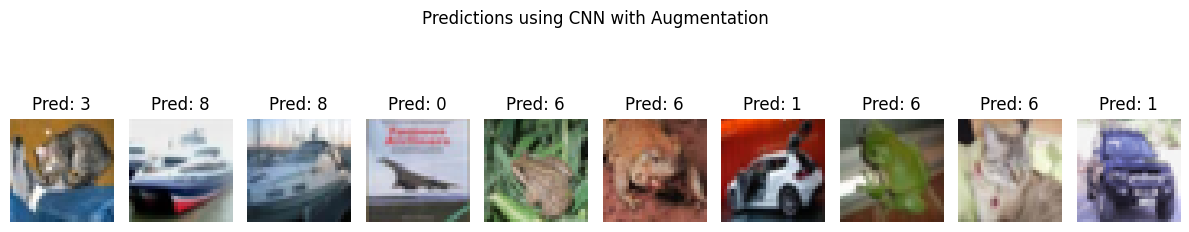

In [ ]:
# Predict on test set
preds = cnn_aug.predict(x_test[:10])
labels = tf.argmax(preds, axis=1)

plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {labels[i].numpy()}")
    plt.axis('off')
plt.suptitle("Predictions using CNN with Augmentation")
plt.tight_layout()
plt.show()
